In [18]:
# Gym
import gym
import gym_anytrading

# Stable baselines 1.15
#TODO look at adding the rest if/as needed
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C, SAC, ACER, PPO2, TD3
# from stable_baselines import DDPG, GAIL

# tf 
import tensorflow as tf

# core
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('data/AAPL.csv')
df.head()


,date,open,high,low,Close,vol,MACD_Signal,MACD_Hist,MACD,Real Upper Band,Real Lower Band,Real Middle Band,RSI,SMA,SMA.1,ROC,CCI,DX,crossover
0,2015-01-02,111.39,111.44,107.350,24.859222,53204626.0,0.0331,-0.0662,-0.0331,26.4382,24.4203,25.4293,43.3753,25.4722,25.2811,-4.2200,-1.2375,1.0230,False
1,2015-01-05,108.29,108.65,105.410,24.158898,64285491.0,0.0005,-0.1305,-0.1300,26.4006,24.2478,25.3242,37.1471,25.1203,25.1997,-7.2952,-39.5183,4.1662,False
2,2015-01-06,106.54,107.43,104.630,24.161172,65797116.0,-0.0405,-0.1638,-0.2043,26.3446,24.1051,25.2248,37.1785,24.7724,25.1471,-7.4518,-51.0223,5.3946,False
3,2015-01-07,107.20,108.20,106.695,24.499965,40105934.0,-0.0790,-0.1541,-0.2332,26.3233,24.0206,25.1720,41.8158,24.5554,25.1399,-5.6242,-32.8844,4.0556,False
4,2015-01-08,109.23,112.15,108.700,25.441309,59364547.0,-0.0988,-0.0792,-0.1780,26.2498,24.0434,25.1466,52.2985,24.6241,25.2179,-1.8810,14.4123,2.4124,False


In [4]:

env = gym.make('stocks-v0', df=df, frame_bound=(5,200), window_size=5)

In [5]:
env.signal_features

array([[ 2.48592221e+01,  0.00000000e+00],
       [ 2.41588982e+01, -7.00323827e-01],
       [ 2.41611720e+01,  2.27377870e-03],
       [ 2.44999650e+01,  3.38793020e-01],
       [ 2.54413094e+01,  9.41344364e-01],
       [ 2.54685948e+01,  2.72853439e-02],
       [ 2.48410318e+01, -6.27562910e-01],
       [ 2.50615884e+01,  2.20556530e-01],
       [ 2.49660897e+01, -9.54987037e-02],
       [ 2.42885036e+01, -6.77586040e-01],
       [ 2.40997800e+01, -1.88723629e-01],
       [ 2.47205216e+01,  6.20741574e-01],
       [ 2.49092452e+01,  1.88723629e-01],
       [ 2.55572721e+01,  6.48026918e-01],
       [ 2.56891513e+01,  1.31879162e-01],
       [ 2.57164366e+01,  2.72853439e-02],
       [ 2.48160203e+01, -9.00416349e-01],
       [ 2.62189417e+01,  1.40292143e+00],
       [ 2.70352282e+01,  8.16286538e-01],
       [ 2.66395908e+01, -3.95637487e-01],
       [ 2.69738362e+01,  3.34245463e-01],
       [ 2.69783838e+01,  4.54755730e-03],
       [ 2.71852976e+01,  2.06913858e-01],
       [ 2.

In [6]:
env.action_space

Discrete(2)

info {'total_reward': 0.8928065980000035, 'total_profit': 0.4866120559039178, 'position': 0}


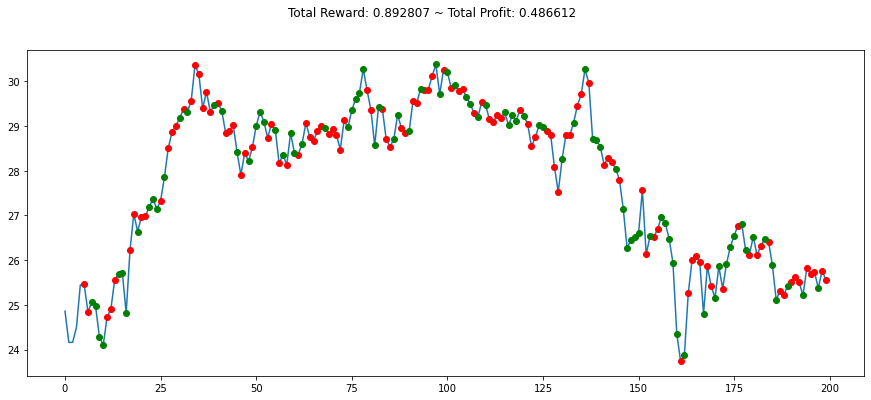

In [7]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()





In [9]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])








In [10]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=50000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | 0.372    |
| fps                | 19       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.0196   |
---------------------------------
---------------------------------
| explained_variance | -0.00473 |
| fps                | 379      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.935    |
---------------------------------
---------------------------------
| explained_variance | -0.498   |
| fps                | 399     

KeyboardInterrupt: 

In [13]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break


info {'total_reward': 1.0131369391999954, 'total_profit': 0.9738125908655628, 'position': 1}


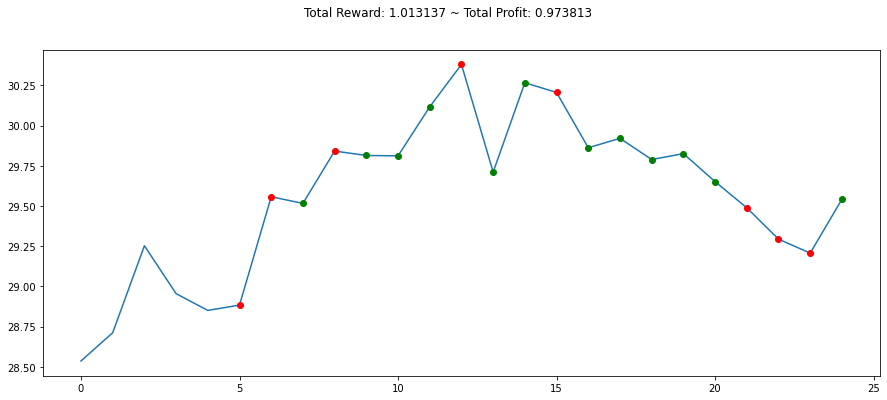

In [14]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()


In [20]:
model.save("a2c_cartpole")

In [21]:
del model

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [28]:
model = A2C.load("a2c_cartpole")
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

Loading a model without an environment, this model cannot be trained until it has a valid environment.
info {'total_reward': 0.4400956839999992, 'total_profit': 0.9491004128011261, 'position': 1}


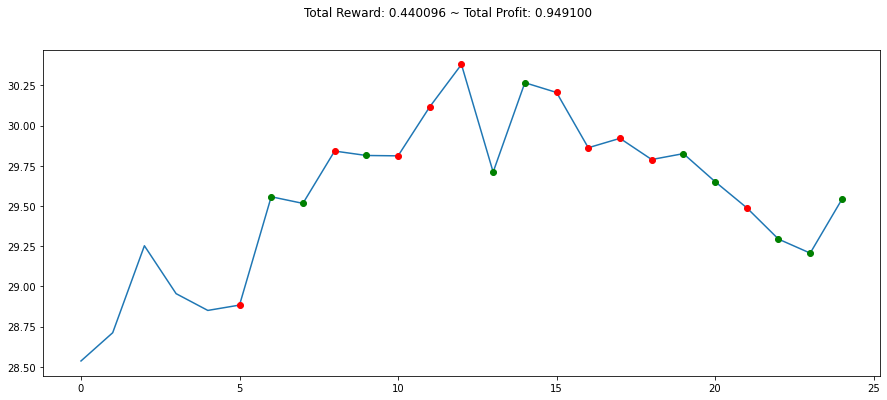

In [29]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()